In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('D:/Term-2/MachineLearning')

In [2]:
data=pd.read_csv('breast_cancer.csv')
y=data['diagnosis']
data=data.drop(['diagnosis','id'],axis=1)


In [3]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(data,y,test_size=0.3,
                                           random_state=33)


In [4]:
from sklearn.neighbors import KNeighborsClassifier
knnmod=KNeighborsClassifier(n_jobs=-1)
knnmod.fit(xtrain,ytrain)
ypred=knnmod.predict(xtest)

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,auc,classification_report
acc=accuracy_score(ytest,ypred)
print(acc)

0.9239766081871345


In [6]:
#confusion matrix
cm=confusion_matrix(ytest,ypred)
print(cm)
print(ytest.value_counts())
print(np.unique(ypred,return_counts=True))

[[101   4]
 [  9  57]]
B    105
M     66
Name: diagnosis, dtype: int64
(array(['B', 'M'], dtype=object), array([110,  61], dtype=int64))


In [9]:
[tn,fp,fn,tp]=confusion_matrix(ytest,ypred).ravel()
sens_tpr=(tp/(tp+fn))*100
spec_tnr=(tn/(tn+fp))*100
fpr=(1-(spec_tnr/100))*100
prec=(tp/(tp+fp))*100




In [10]:
rep=classification_report(ytest,ypred)
rep

'             precision    recall  f1-score   support\n\n          B       0.92      0.96      0.94       105\n          M       0.93      0.86      0.90        66\n\navg / total       0.92      0.92      0.92       171\n'

In [8]:
yprob=knnmod.predict_proba(xtest)

In [9]:
yprob

array([[0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0.6, 0.4],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0. , 1. ],
       [1. ,

In [12]:
!pip install scikit_plot

You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


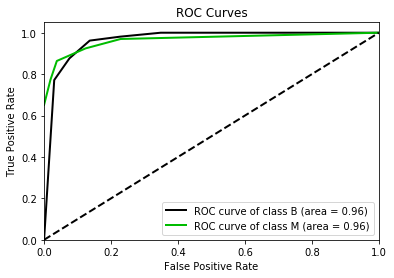

<Figure size 432x288 with 0 Axes>

In [15]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_roc_curve(ytest,yprob,curves=("each_class"))
plt.figure()
cm1=skplt.metrics.confusion_matrix(ytest,ypred)


<Figure size 432x288 with 0 Axes>

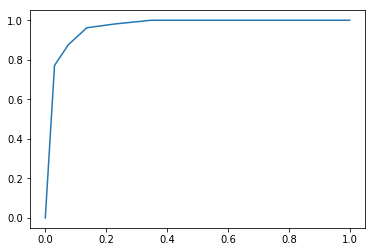

<Figure size 432x288 with 0 Axes>

In [16]:
#yprob1=knnmod.predict_proba(xtest)[:,0]
fpr,tpr,_=roc_curve(ytest,yprob[:,0],pos_label='B')
plt.plot(fpr,tpr)
plt.figure()


In [10]:
fpr,tpr,_=roc_curve(ytest,yprob[:,1],pos_label='M')
plt.plot(fpr,tpr)


NameError: name 'plt' is not defined